# Python Learning Series - Jupyter Notebooks + BigQuery API
_The Jupyter Notebook is an open-source web application that allows you to create and share documents that contain live code, equations, visualizations and narrative text. Uses include: data cleaning and transformation, numerical simulation, statistical modeling, data visualization, machine learning, and much more._

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.cloud import bigquery

### Connect to the BigQuery client.  
Note: I already have my GCP Application Default Credentials set up, so I do not need to pass my credentials as a parameter for the client.  To set up your GCP creds, follow the instructions here for developing locally:
https://googleapis.dev/python/google-api-core/latest/auth.html#overview.

In [87]:
client = bigquery.Client()

/usr/local/lib/python3.7/site-packages/google/auth/_default.py:69: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)
/usr/local/lib/python3.7/site-packages/google/auth/_default.py:69: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnin

### Pull data from BigQuery using the client.
You'll need the project id, dataset and table name that you want to pull.

In [88]:
PROJECT = "ds-de-sandbox"
DATASET = "sfdc_raw"
TABLE = "Opportunity"

query = f'SELECT * FROM {PROJECT}.{DATASET}.{TABLE} LIMIT 1000'

df = client.query(query).to_dataframe()

In [89]:
df

,Id,IsDeleted,AccountId,RecordTypeId,Name,Description,StageName,Amount,Probability,CloseDate,...,Metrics__c,Other_Use_Cases_from_applications__c,Use_Case_Categories__c,ERM_Temp_Coverage__c,ESM_Temp_Coverage__c,Renewal_Temp_Coverage__c,New_Enterprise_w_out_Hierarchy__c,New_Enterprise_w_out_Hierarchy_Override__c,Perpetual_License_Value__c,Perpetual_License_Value_RollUp__c
0,0061500000Thvh2AAB,False,0011500001MFScIAAX,01215000000zztRAAQ,Bronze Support Subscription,None,Booked,8000.00,100.0,2010-04-29,...,None,None,None,None,None,None,None,None,NaN,NaN
1,0061500000Thvh3AAB,False,0011500001MFSgwAAH,01215000000zztRAAQ,Training,None,Booked,3700.00,100.0,2010-04-28,...,None,None,None,None,None,None,None,None,NaN,NaN
2,0061500000ThvgVAAR,False,0011500001MFSfdAAH,01215000000zztRAAQ,Consulting - 10 hours,None,Booked,1500.00,100.0,2010-04-28,...,None,None,None,None,None,None,None,None,NaN,NaN
3,0061500000ThvgiAAB,False,0011500001MFSboAAH,01215000000zztRAAQ,Training - Inside,None,Booked,7590.00,100.0,2010-05-21,...,None,None,None,None,None,None,None,None,NaN,NaN
4,0061500000ThvgwAAB,False,0011500001MFSgRAAX,01215000000zztRAAQ,Silver Support Subscription,None,Booked,7980.00,100.0,2010-07-14,...,None,None,None,None,None,None,None,None,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0061500000Thw8RAAR,False,0011500001MFVxtAAH,01215000000zztRAAQ,AnubisNetworks - 10 hours Remote Consulting,None,Booked,4000.00,100.0,2014-09-19,...,None,None,None,None,None,None,None,None,NaN,NaN
996,0061500000Thw8aAAB,False,0011500001MFSwFAAX,01215000000zztRAAQ,Epsilon - 12 nodes Add-On,None,Booked,23999.04,100.0,2014-10-29,...,None,None,None,None,None,None,None,None,NaN,NaN
997,0061500000Thw6JAAR,False,0011500001MFSsMAAX,01215000000zztRAAQ,"EWS - OST Phoenix, CASCOR & DSESLR - PS OnSite...",None,Booked,37500.00,100.0,2014-10-22,...,None,None,None,None,None,None,None,None,NaN,NaN
998,0061500000Thw89AAB,False,0011500001MFUk7AAH,01215000000zztRAAQ,ClearCapitalcom - Add-on - ADVS - 36 cores PRO...,None,Booked,22680.00,100.0,2014-10-29,...,None,None,None,None,None,None,None,None,NaN,NaN


### Now that we have a pandas dataframe, we can start to use our pandas functions to analyze the data.
First, note the type of the result.

In [90]:
type(df)

pandas.core.frame.DataFrame

Review the schema of the dataframe.

In [91]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 279 columns):
 #   Column                                          Dtype         
---  ------                                          -----         
 0   Id                                              object        
 1   IsDeleted                                       bool          
 2   AccountId                                       object        
 3   RecordTypeId                                    object        
 4   Name                                            object        
 5   Description                                     object        
 6   StageName                                       object        
 7   Amount                                          float64       
 8   Probability                                     float64       
 9   CloseDate                                       object        
 10  Type                                            object        
 11  Next

View the first 5 rows in the dataframe.

In [92]:
df.head()

,Id,IsDeleted,AccountId,RecordTypeId,Name,Description,StageName,Amount,Probability,CloseDate,...,Metrics__c,Other_Use_Cases_from_applications__c,Use_Case_Categories__c,ERM_Temp_Coverage__c,ESM_Temp_Coverage__c,Renewal_Temp_Coverage__c,New_Enterprise_w_out_Hierarchy__c,New_Enterprise_w_out_Hierarchy_Override__c,Perpetual_License_Value__c,Perpetual_License_Value_RollUp__c
0,0061500000Thvh2AAB,False,0011500001MFScIAAX,01215000000zztRAAQ,Bronze Support Subscription,None,Booked,8000.0,100.0,2010-04-29,...,None,None,None,None,None,None,None,None,NaN,NaN
1,0061500000Thvh3AAB,False,0011500001MFSgwAAH,01215000000zztRAAQ,Training,None,Booked,3700.0,100.0,2010-04-28,...,None,None,None,None,None,None,None,None,NaN,NaN
2,0061500000ThvgVAAR,False,0011500001MFSfdAAH,01215000000zztRAAQ,Consulting - 10 hours,None,Booked,1500.0,100.0,2010-04-28,...,None,None,None,None,None,None,None,None,NaN,NaN
3,0061500000ThvgiAAB,False,0011500001MFSboAAH,01215000000zztRAAQ,Training - Inside,None,Booked,7590.0,100.0,2010-05-21,...,None,None,None,None,None,None,None,None,NaN,NaN
4,0061500000ThvgwAAB,False,0011500001MFSgRAAX,01215000000zztRAAQ,Silver Support Subscription,None,Booked,7980.0,100.0,2010-07-14,...,None,None,None,None,None,None,None,None,NaN,NaN


Get summary statistics for the table.

In [93]:
df.describe()

,Amount,Probability,FiscalQuarter,FiscalYear,Contract_Length_months__c,Count__c,Days_Since_Last_Stage_Change__c,Age__c,Push_Count__c,Renewal_Baseline__c,...,Has_Renewal_For_Next_Fiscal_Year_Total__c,LeanData__Days_In_Stage__c,LeanData__Days_To_Close__c,LeanData__Reporting_Total_Marketing_Touches__c,Subscription_StartDate_12_Months_Total__c,Outside_CQ_1_Total__c,Outside_CQ_1_ACV__c,Baseline_Contribution__c,Perpetual_License_Value__c,Perpetual_License_Value_RollUp__c
count,1.000000e+03,1000.0,1000.000000,1000.00000,544.000000,1000.0,1000.000000,1000.000000,1000.0,0.0,...,1000.0,0.0,1000.000000,0.0,1000.0,1000.0,1000.0,0.0,0.0,0.0
mean,6.395187e+04,100.0,2.601000,2013.47800,14.588235,1.0,2577.056000,42.130000,0.0,NaN,...,0.0,NaN,42.130000,NaN,0.0,0.0,0.0,NaN,NaN,NaN
std,5.975332e+05,0.0,1.063452,1.10939,9.362730,0.0,395.547229,110.440301,0.0,NaN,...,0.0,NaN,110.440301,NaN,0.0,0.0,0.0,NaN,NaN,NaN
min,-2.372153e+05,100.0,1.000000,2011.00000,0.000000,1.0,1862.000000,-299.000000,0.0,NaN,...,0.0,NaN,-299.000000,NaN,0.0,0.0,0.0,NaN,NaN,NaN
25%,4.750000e+03,100.0,2.000000,2013.00000,12.000000,1.0,2261.000000,0.000000,0.0,NaN,...,0.0,NaN,0.000000,NaN,0.0,0.0,0.0,NaN,NaN,NaN
50%,1.320000e+04,100.0,3.000000,2014.00000,12.000000,1.0,2553.000000,18.000000,0.0,NaN,...,0.0,NaN,18.000000,NaN,0.0,0.0,0.0,NaN,NaN,NaN
75%,3.015000e+04,100.0,4.000000,2014.00000,12.000000,1.0,2871.000000,65.000000,0.0,NaN,...,0.0,NaN,65.000000,NaN,0.0,0.0,0.0,NaN,NaN,NaN
max,1.838994e+07,100.0,4.000000,2015.00000,61.000000,1.0,3281.000000,794.000000,0.0,NaN,...,0.0,NaN,794.000000,NaN,0.0,0.0,0.0,NaN,NaN,NaN


Select all opportunities that have an amount greater than 100000.

In [94]:
df[df["Amount"] > 100000]

,Id,IsDeleted,AccountId,RecordTypeId,Name,Description,StageName,Amount,Probability,CloseDate,...,Metrics__c,Other_Use_Cases_from_applications__c,Use_Case_Categories__c,ERM_Temp_Coverage__c,ESM_Temp_Coverage__c,Renewal_Temp_Coverage__c,New_Enterprise_w_out_Hierarchy__c,New_Enterprise_w_out_Hierarchy_Override__c,Perpetual_License_Value__c,Perpetual_License_Value_RollUp__c
239,0061500000ThwOrAAJ,False,0011500001MFSjuAAH,01215000000zztRAAQ,Walmart.com - 66n (per datacenter,None,Booked,106108.00,100.0,2012-07-20,...,None,None,None,None,None,None,None,None,NaN,NaN
243,0061500000ThwPsAAJ,False,0011500001MFSklAAH,01215000000zztRAAQ,Expedia 3-yr Gold Support - TA Portion,None,Booked,299520.00,100.0,2012-05-09,...,None,None,None,None,None,None,None,None,NaN,NaN
282,0061500000ThwNJAAZ,False,0011500001MFSklAAH,01215000000zztRAAQ,Expedia 3-yr Gold Support - BL Portion,None,Booked,582480.00,100.0,2012-05-09,...,None,None,None,None,None,None,None,None,NaN,NaN
314,0061500000ThwRjAAJ,False,0011500001MFSwDAAX,01215000000zztRAAQ,USG3- DSE Gold - 20 Nodes,None,Booked,110000.00,100.0,2012-09-20,...,None,None,None,None,None,None,None,None,NaN,NaN
316,0061500000ThwPNAAZ,False,0011500001MFSwoAAH,01215000000zztRAAQ,Compuscan- DSE Gold - 8 Nodes - 3 Years,None,Booked,105600.00,100.0,2012-09-20,...,None,None,None,None,None,None,None,None,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,0061500000ThvzTAAR,False,0011500001MFScRAAX,01215000000zztRAAQ,Comcast Q3 2014 True-Up,None,Booked,405744.12,100.0,2014-10-30,...,None,None,None,None,None,None,None,None,NaN,NaN
971,0061500000Thw6NAAR,False,0011500001MFVF3AAP,01215000000zztRAAQ,British Gas - New - (144) Core Max Prod,None,Booked,115188.48,100.0,2014-10-15,...,None,None,None,None,None,None,None,None,NaN,NaN
982,0061500000Thw45AAB,False,0011500001MFTAjAAP,01215000000zztRAAQ,Sears Holdin_Sears - UPS - BOOKED,None,Booked,112000.32,100.0,2014-10-31,...,None,None,None,None,None,None,None,None,NaN,NaN
983,0061500000ThwUDAAZ,False,0011500001MFTAjAAP,01215000000zztRAAQ,Sears - UC,None,Booked,130000.32,100.0,2014-09-26,...,None,None,None,None,None,None,None,None,NaN,NaN


Group the table by Fiscal Quarter and calculate the sum of the opportunity amount for each quarter.

In [95]:
df.groupby('FiscalQuarter')["Amount"].sum()

FiscalQuarter
1     7733849.98
2    30980496.06
3    16921672.67
4     8315853.83
Name: Amount, dtype: float64

Create a pivot table.

In [96]:
pd.pivot_table(df, values='Amount', index=['AccountId'], columns=['FiscalQuarter'])

FiscalQuarter,1,2,3,4
AccountId,,,,
0011500001MFSCtAAP,NaN,NaN,9999.0,NaN
0011500001MFSb0AAH,NaN,NaN,96000.0,NaN
0011500001MFSbJAAX,3000.0,NaN,0.0,NaN
0011500001MFSbKAAX,NaN,1500.0,NaN,NaN
0011500001MFSbLAAX,NaN,NaN,3000.0,NaN
...,...,...,...,...
0011500001MFWj4AAH,5775.0,NaN,NaN,NaN
0011500001MFWj5AAH,NaN,3200.0,4800.0,NaN
0011500001MFWj7AAH,NaN,NaN,NaN,7200.0


### We can also create some data visualizations.

Create a bar chart using our group by data above.

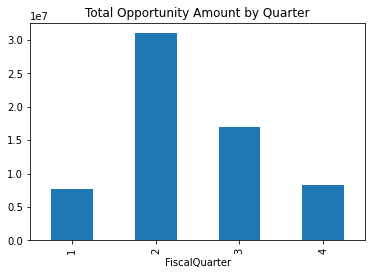

In [97]:
df.groupby('FiscalQuarter')["Amount"].sum().plot(kind = "bar")
plt.title('Total Opportunity Amount by Quarter')
plt.show()

Create a histogram.

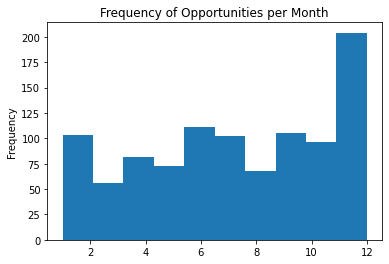

In [98]:
df['CloseDate'] = pd.to_datetime(df['CloseDate'],infer_datetime_format=True)

plt.clf() # clear the figure
df['CloseDate'].map(lambda d: d.month).plot(kind='hist')
plt.title('Frequency of Opportunities per Month')
plt.show()

In [101]:
list(client.list_datasets())